# 11: Phase estimation problem

In [1]:
from renom_q import *
import math

The phase estimation problem is to estimate the phase $\theta$ of the unitary transformation when a unitary transformation is given.  
When a certain unitary transformation U is given, if eigenvector $\left| u \right\rangle$ of the unitary transformation and its eigenvalue is $\lambda = e^{i\theta} = e^{2\pi i \phi}$, the following relational expression is obtained.
$$U\left| u \right\rangle = \lambda\left| u \right\rangle= e^{i\theta}\left| u \right\rangle = e^{2\pi i \phi}\left| u \right\rangle = e^{2\pi i 0.a_1 a_2 a_3 \dots}\left| u \right\rangle$$

$\theta$ is the phase $\theta= 2\pi \phi$ of the unitary transformation $U$, $\phi$ is not an integer, it becomes the following decimal point from 1 as follows.
$$0 \leq 2 \pi \phi < 2 \pi \rightarrow 0 \leq \phi < 1$$ 

In order to estimate the decimal point from the binary value by measuring the quantum bit, we use the control $U$ gate.
$$\left| 0 \right\rangle \left| u \right\rangle \xrightarrow{H \otimes I} (\left| 0 \right\rangle + \left| 1 \right\rangle) \left| u \right\rangle \xrightarrow{cU} \left| 0 \right\rangle \left| u \right\rangle + \left| 1 \right\rangle U \left| u \right\rangle =  (\left| 0 \right\rangle + e^{2 \pi i \phi} \left| 1 \right\rangle) \left| u \right\rangle $$

At this time, the eigenvalue $\lambda$ is generated at the target gate. This is called a reward of eigenvalues (Kickback).

## 11-1: Phase estimation problem with 3 qubits

We solve the phase estimation problem with 3 qubits using 3 control $U$ gates. It is calculated by using Hadamard transformation and unitary $U^3=U\cdot U \cdot U$, and if the upper 3 bits are subjected to inverse quantum Fourier transformation, the phase value $\left| x_1 x_2 x_3 \right\rangle$ of unitary transformation $U\left| u \right\rangle = \lambda\left| u \right\rangle = e^{2\pi i 0.x_1 x_2 x_3}\left| u \right\rangle$ is found.

$$\left| 000 \right\rangle \left| u \right\rangle \xrightarrow{H \otimes H \otimes H \otimes I} (\left| 0 \right\rangle + \left| 1 \right\rangle)(\left| 0 \right\rangle + \left| 1 \right\rangle)(\left| 0 \right\rangle + \left| 1 \right\rangle)\left| u \right\rangle \xrightarrow{cU} \xrightarrow{cU^2} \xrightarrow{cU^3} (\left| 0 \right\rangle + (e^{2\pi i \phi})^3 \left| 1 \right\rangle)(\left| 0 \right\rangle + (e^{2\pi i \phi})^2 \left| 1 \right\rangle)(\left| 0 \right\rangle + e^{2\pi i \phi} \left| 1 \right\rangle)\left| u \right\rangle = (\left| 0 \right\rangle + (e^{2\pi i 0.x_1 x_2 x_3})^3 \left| 1 \right\rangle)(\left| 0 \right\rangle + (e^{2\pi i 0.x_1 x_2 x_3})^2 \left| 1 \right\rangle)(\left| 0 \right\rangle + e^{2\pi i 0.x_1 x_2 x_3} \left| 1 \right\rangle)\left| u \right\rangle = (\left| 0 \right\rangle + e^{2\pi i 0.x_3} \left| 1 \right\rangle)(\left| 0 \right\rangle + e^{2\pi i 0.x_2 x_3} \left| 1 \right\rangle)(\left| 0 \right\rangle + e^{2\pi i 0.x_1 x_2 x_3} \left| 1 \right\rangle)\left| u \right\rangle  \xrightarrow{QFT^{-1}_8} \left| x_3 \right\rangle \left| x_2 \right\rangle \left| x_1 \right\rangle \left| u \right\rangle $$

For example, assuming that the phase to be estimated is $\theta=14\pi/8$,

{'000': 56, '010': 9, '100': 12, '110': 56, '111': 891}


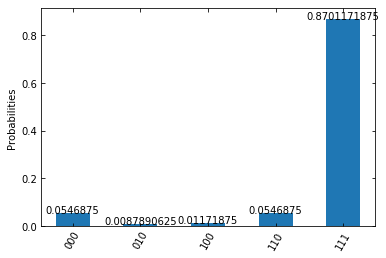

In [2]:
def ctlUn(qci, c, t, p, n):
    for i in range(n):
        qci.u1(-p, t)
        qci.cx(c, t)
        qci.u1(p, t)
        qci.cx(c, t)
        
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-math.pi/float(2**(i-j)),q[j], q[i])
        qci.h(q[i])
        
def swap(qci, s1, s2):
    qci.cx(s1, s2)
    qci.cx(s2, s1)
    qci.cx(s1, s2)
    
n = 3
phase = 14.0*math.pi/8.0
qr = QuantumRegister(n, 'qr')
ur = QuantumRegister(1, 'ur')
c = ClassicalRegister(n)
qc = QuantumCircuit(qr, ur, c)


for i in range(n):
    qc.h(qr[i])

for i in range(n):
    ctlUn(qc, qr[n-1-i], ur[0], phase, i+1)

iqft(qc, qr, n)
swap(qc, qr[0], qr[2])

qc.measure(qr, c)
    
r = execute(qc)
print(r)
plot_histogram(r)

$\left| 111 \right\rangle$ has been measured, the phase of the unitary transformation $U\left| u \right\rangle = \lambda\left| u \right\rangle = e^{2\pi i 0.111}\left| u \right\rangle$ is $\theta = 2\pi (1/2 + 1/4 + 1/8)=14\pi /8$, which coincides with the phase which is set at the beginning and is to be estimated.